Let's try overfitting a high-order polynomial on the given points.  
The 'fit_polynomial' function is generating the Least Square Matrix.  
An n-degree polynomial can fit n+1 points (provided x values are unique)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_points(m, c, num_points, noise_std=2):
    """Generates random points along a line with Gaussian noise."""
    x = np.random.uniform(-10, 10, num_points)
    noise = np.random.normal(0, noise_std, x.shape)
    # y = m * x + c + noise
    y = 0.3*x**2 + m * x + c + 1*noise
    return x, y

def fit_polynomial(x, y, degree):
    """Fits a polynomial of given degree to the points (x, y) using least squares."""
    n = len(x)
    X = np.vstack([x**i for i in range(degree + 1)]).T
    
    # Construct the matrix for least squares fitting
    A = np.zeros((degree + 1, degree + 1))
    b = np.zeros(degree + 1)
    
    for i in range(degree + 1):
        for j in range(degree + 1):
            A[i, j] = np.sum(x**(i + j))
        b[i] = np.sum(y * x**i)
    
    # Perform Gauss-Jordan elimination to find the inverse of A
    def gauss_jordan(A):
        n = len(A)
        augmented_matrix = np.hstack((A, np.eye(n)))
        for i in range(n):
            factor = augmented_matrix[i, i]
            augmented_matrix[i] = augmented_matrix[i] / factor
            for j in range(n):
                if i != j:
                    factor = augmented_matrix[j, i]
                    augmented_matrix[j] -= factor * augmented_matrix[i]
        return augmented_matrix[:, n:]

    inv_A = gauss_jordan(A)
    coefficients = np.dot(inv_A, b)
    return coefficients

def plot_points_and_curve(x, y, coefficients):
    """Plots the random points and the fitted polynomial curve."""
    x_line = np.linspace(-10, 10, 100)
    y_line = sum(coefficients[i] * x_line**i for i in range(len(coefficients)))
    
    plt.scatter(x, y, color='red', label='Random Points')
    plt.plot(x_line, y_line, color='blue', label='Fitted Polynomial')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Random Points and Fitted Polynomial Curve')
    plt.legend()
    plt.grid(True)
    plt.xlim(-50, 50)  # Set x-axis limits
    plt.ylim(-50, 50)  # Set y-axis limits
    plt.show()

# Example usage
m = 2
c = 5
num_points = 50
degree = 3

x, y = generate_points(m, c, num_points)
coefficients = fit_polynomial(x, y, degree)
plot_points_and_curve(x, y, coefficients)


Let's implement a basic Gradient Descent Algorithm for comparison with analytical solution

[ 3.95568711 -0.04045276 -2.92212814 -0.97747164  4.55660613]
Iteration 10000, Loss: 5.238967708547249, Learning Rate: 0.0001
Iteration 20000, Loss: 3.1380491265367425, Learning Rate: 0.0001
Iteration 30000, Loss: 2.0441514339561353, Learning Rate: 0.0001
Iteration 40000, Loss: 1.474484727270994, Learning Rate: 0.0001
Iteration 50000, Loss: 1.17782063365823, Learning Rate: 0.0001
Iteration 60000, Loss: 1.0233275179349282, Learning Rate: 0.0001
Iteration 70000, Loss: 0.9428724735942645, Learning Rate: 0.0001
Iteration 80000, Loss: 0.9009740748885945, Learning Rate: 0.0001
Iteration 90000, Loss: 0.8791547367913277, Learning Rate: 0.0001
Iteration 100000, Loss: 0.8677919274785577, Learning Rate: 0.0001
Iteration 110000, Loss: 0.8618745419509651, Learning Rate: 0.0001
Iteration 120000, Loss: 0.8587929579413883, Learning Rate: 0.0001
Iteration 130000, Loss: 0.8571881681294319, Learning Rate: 0.0001
Iteration 140000, Loss: 0.8563524452244078, Learning Rate: 0.0001
Iteration 150000, Loss: 0.8

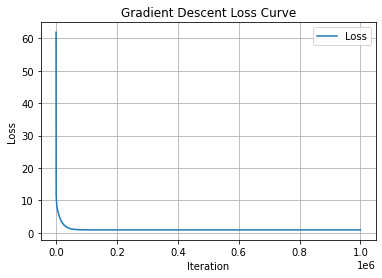

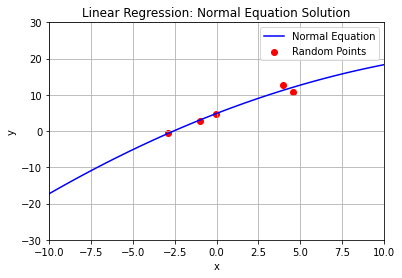

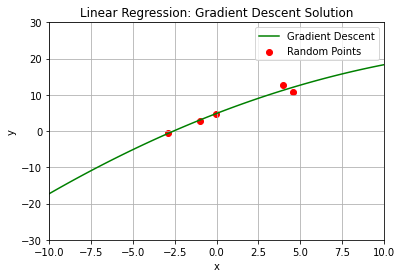

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def generate_points(m, c, num_points, noise_std=2):
    """Generates random points along a line with Gaussian noise."""
    x = np.random.uniform(-10, 10, num_points)
    noise = np.random.normal(0, noise_std, x.shape)
    y = m * x + c + noise
    return x, y

def fit_polynomial(x, y, degree):
    """Fits a polynomial of given degree to the points (x, y) using least squares."""
    n = len(x)
    X = np.vstack([x**i for i in range(degree + 1)]).T
    
    # Construct the matrix for least squares fitting
    A = np.zeros((degree + 1, degree + 1))
    b = np.zeros(degree + 1)
    
    for i in range(degree + 1):
        for j in range(degree + 1):
            A[i, j] = np.sum(x**(i + j))
        b[i] = np.sum(y * x**i)
    
    # Perform Gauss-Jordan elimination to find the inverse of A
    def gauss_jordan(A):
        n = len(A)
        augmented_matrix = np.hstack((A, np.eye(n)))
        for i in range(n):
            factor = augmented_matrix[i, i]
            augmented_matrix[i] = augmented_matrix[i] / factor
            for j in range(n):
                if i != j:
                    factor = augmented_matrix[j, i]
                    augmented_matrix[j] -= factor * augmented_matrix[i]
        return augmented_matrix[:, n:]

    inv_A = gauss_jordan(A)
    coefficients = np.dot(inv_A, b)
    return coefficients

def gradient_descent(x, y, learning_rate=0.01, iterations=1000, degree=2):
    # x = x/10
    # y = y/10
    # degree = 2
    """Performs gradient descent to fit a linear regression model."""
    n = len(x)
    theta = np.zeros(degree + 1)  # Initialize coefficients for polynomial of given degree
    # theta = np.random.uniform(-1, 1, degree + 1)
    # X = np.vstack((np.ones(n), x)).T
    X = np.vstack([x**i for i in range(degree + 1)]).T

    y = y.reshape(-1, 1)
    
    loss_history = []
    i = 0

    for _ in range(iterations):
        predictions = np.dot(X, theta).reshape(-1, 1)
        # print(theta)
        errors = predictions - y
        gradient = (1 / n) * np.dot(X.T, errors)
        theta -= learning_rate * gradient.flatten()
        
        # Compute and store the loss
        loss = (1 / n) * np.sum(errors ** 2)
        loss_history.append(loss)
        i += 1
        if i % int(1.0e4) == 0:
            # learning_rate *= 0.5  # Decay learning rate every 1000 iterations
            print(f"Iteration {i}, Loss: {loss}, Learning Rate: {learning_rate}")
    
    return theta, loss_history

def plot_points_and_curves(x, y, normal_eq_coeff, gd_coeff):
    """Plots the random points and the fitted linear curves in separate figures."""
    x_line = np.linspace(-10, 10, 100)
    degree = len(gd_coeff) - 1
    y_gd = 0
    for i in range(len(gd_coeff)):
        y_gd += gd_coeff[i] * (x_line/1)**i

    y_normal_eq = 0
    for i in range(len(normal_eq_coeff)):
        y_normal_eq += normal_eq_coeff[i] * x_line**i


    
    # Plot the normal equation solution
    plt.figure()
    plt.scatter(x, y, color='red', label='Random Points')
    plt.plot(x_line, y_normal_eq, color='blue', label='Normal Equation')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression: Normal Equation Solution')
    plt.legend()
    plt.grid(True)
    plt.xlim(-10, 10)
    plt.ylim(-30, 30)
    plt.show()
    
    # Plot the gradient descent solution
    plt.figure()
    plt.scatter(x, y, color='red', label='Random Points')
    plt.plot(x_line, y_gd, color='green', label='Gradient Descent')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression: Gradient Descent Solution')
    plt.legend()
    plt.grid(True)
    plt.xlim(-10, 10)
    plt.ylim(-30, 30)
    plt.show()

def plot_loss_curve(loss_history):
    """Plots the loss curve for gradient descent."""
    plt.figure()
    plt.plot(loss_history, label='Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Gradient Descent Loss Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
m = 2
c = 5
num_points = 5
degree = 2

x, y = generate_points(m, c, num_points)
print(x)
normal_eq_coeff = fit_polynomial(x, y, degree)

learning_rate=1e-4
iterations=int(1.0e6)

gd_coeff, loss_history = gradient_descent(x, y, learning_rate, iterations, degree)

print("Normal Equation Coefficients:", normal_eq_coeff)
print("Gradient Descent Coefficients:", gd_coeff)

plot_loss_curve(loss_history)
plot_points_and_curves(x, y, normal_eq_coeff, gd_coeff)



Curve Fitting using sklearn library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Simulate noisy linear data
num_points = 10
noise_std = 2.0
m = 1.5
c = -3.0

x = np.random.uniform(-10, 10, num_points)
noise = np.random.normal(0, noise_std, x.shape)
y = m * x + c + noise

# Reshape x for sklearn
x = x.reshape(-1, 1)

# Polynomial degree
degree = 8  # You can increase this for more complex curves

# Fit polynomial model
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(x)
model = LinearRegression()
model.fit(X_poly, y)

# Generate smooth x range for plotting
x_line = np.linspace(-10, 10, 100).reshape(-1, 1)
X_line_poly = poly.transform(x_line)
y_line_fit = model.predict(X_line_poly)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Noisy data', alpha=0.6)
plt.plot(x_line, y_line_fit, color='red', linewidth=2, label=f'Polynomial fit (degree {degree})')
plt.title('Polynomial Curve Fitting')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()